# How to update graph state from nodes

In [4]:
from langchain_core.messages import AIMessage, AnyMessage, HumanMessage
from langgraph.graph import START, MessagesState, StateGraph
from langgraph.graph.message import add_messages
from typing_extensions import Annotated, TypedDict


In [6]:
def init_graph():
    class State(TypedDict):
        messages: list[AnyMessage]
        extra_field: int


    def node(state: State):
        messages = state["messages"]
        new_message = AIMessage("Hello!")

        return {"messages": messages + [new_message], "extra_field": 10}

    graph_builder = StateGraph(State)
    graph_builder.add_node(node)
    graph_builder.set_entry_point("node")
    graph = graph_builder.compile()
    return graph


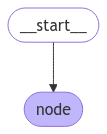

In [7]:
from IPython.display import Image, display
display(Image(init_graph().get_graph().draw_mermaid_png()))

## Graph

In [9]:
def example_graph():
    graph = init_graph()
    result = graph.invoke({"messages": [HumanMessage("Hi")]})
    for message in result["messages"]:
        message.pretty_print()

example_graph()

================================ Human Message =================================

Hi
================================== Ai Message ==================================

Hello!


## Graph State with Reducer add

In [10]:

def example_graph_state_with_reducer_add():
    def add(left, right):
        """Can also import `add` from the `operator` built-in."""
        return left + right

    class State(TypedDict):
        messages: Annotated[list[AnyMessage], add]
        extra_field: int

    def node(state: State):
        new_message = AIMessage("Hello!")
        return {"messages": [new_message], "extra_field": 10}

    graph = StateGraph(State).add_node(node).add_edge(START, "node").compile()
    result = graph.invoke({"messages": [HumanMessage("Hi")]})
    for message in result["messages"]:
        message.pretty_print()

example_graph_state_with_reducer_add()

================================ Human Message =================================

Hi
================================== Ai Message ==================================

Hello!


## Graph State with Reducer add_messages

In [11]:

def example_graph_state_with_reducer_add_messages():
    # https://langchain-ai.github.io/langgraph/reference/graphs/#langgraph.graph.message.add_messages
    def add(left, right):
        """Can also import `add` from the `operator` built-in."""
        return left + right

    class State(TypedDict):
        messages: Annotated[list[AnyMessage], add_messages]
        extra_field: int

    def node(state: State):
        new_message = AIMessage("Hello!")
        return {"messages": [new_message], "extra_field": 10}

    graph = StateGraph(State).add_node(node).add_edge(START, "node").compile()
    # accept format short-hands for messages format
    input_message = {"role": "user", "content": "Hi"}
    result = graph.invoke({"messages": [input_message]})
    for message in result["messages"]:
        message.pretty_print()

example_graph_state_with_reducer_add_messages()

================================ Human Message =================================

Hi
================================== Ai Message ==================================

Hello!


## Graph with MessagesState

In [12]:

def example_graph_messages_state():
    class State(MessagesState):
        extra_field: int

    def node(state: State):
        return {"messages": [{"role": "ai", "content": "Hello"}], "extra_field": 10}

    graph = StateGraph(State).add_node(node).add_edge(START, "node").compile()
    result = graph.invoke({"messages": [{"role": "user", "content": "Hi"}]})
    for message in result["messages"]:
        message.pretty_print()

example_graph_messages_state()

================================ Human Message =================================

Hi
================================== Ai Message ==================================

Hello
